<a href="https://colab.research.google.com/github/IlyasHidayatR/Python_SimpleProgram/blob/main/Regresi_PrediksiHargaCabai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identifikasi dataset

Dataset yang digunakan adalah data harga bahan pokok cabai merah pada setiap tahun di pasaran.

In [1]:
import pandas as pd

Chili = {'Tahun': [2015, 2016, 2017, 2018, 2019, 2020],
         'Harga Cabai (Rp/Kg)' : [30500, 55150, 96350, 60000, 30000, 48000]}

Chili_df = pd.DataFrame(Chili)
Chili_df

,Tahun,Harga Cabai (Rp/Kg)
0,2015,30500
1,2016,55150
2,2017,96350
3,2018,60000
4,2019,30000
5,2020,48000


# Visualisasi dataset cabai

Dalam hal ini, data akan divisualisasi ke dalam sebuah grafik untuk menentukan target

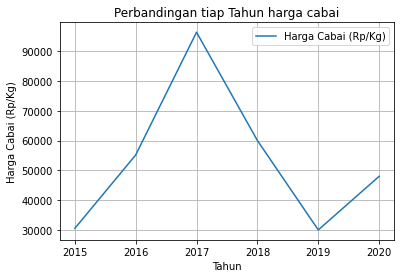

In [2]:
import matplotlib.pyplot as plt

Chili_df.plot.line(x='Tahun', y='Harga Cabai (Rp/Kg)')

plt.title('Perbandingan tiap Tahun harga cabai')
plt.xlabel('Tahun')
plt.ylabel('Harga Cabai (Rp/Kg)')
plt.grid(True)
plt.show()

# Penyesuaian dataset menjadi 2 dimensi

Dalam langkah ini, dataset yang didapat akan disesuaikan dengan model yang akan dibuat

In [3]:
import numpy as np

x = np.array(Chili_df['Tahun'])
y = np.array(Chili_df['Harga Cabai (Rp/Kg)'])

print(f'x: {x}')
print(f'y: {y}')

x: [2015 2016 2017 2018 2019 2020]
y: [30500 55150 96350 60000 30000 48000]


In [4]:
x = x.reshape(-1, 1)
x.shape

(6, 1)

In [5]:
x

array([[2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020]])

# Training Simple Linear Regression Model

Dalam tahap ini, akan dibuat sebuah model menggunakan metode linear regresi

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression()

# Visualisasi Simple Linear Regression Model

Dalam tahap ini, akan menampilkan visualisi model yang telah dibuat dengan menggunakana dataset sebelumnya

In [7]:
x_vis = np.array([2015, 2025]).reshape(-1, 1)
y_vis = model.predict(x_vis)

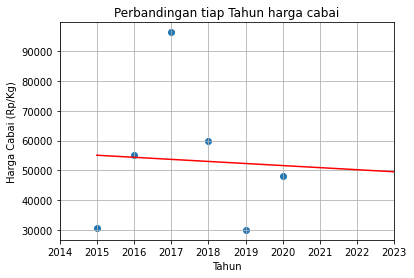

In [15]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis, '-r')

plt.title('Perbandingan tiap Tahun harga cabai')
plt.xlabel('Tahun')
plt.ylabel('Harga Cabai (Rp/Kg)')
plt.xlim(2014, 2023)
plt.grid(True)
plt.show()

Dalam grafik, selanjutnya adalah mencari nilai intercept dan slope yang akan menjadi acuan perhitungan prediksi harga cabai

In [13]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 1454054.7619047614
slope: [-694.28571429]


# Prediksi harga cabai di tahun berikutnya

Pada tahap ini, akan dilakukan uji coba prediksi cabai pada tahun 2021 dan 2022

In [17]:
tahun_chili = np.array([2021, 2022]).reshape(-1, 1)
tahun_chili

array([[2021],
       [2022]])

In [18]:
prediksi_harga = model.predict(tahun_chili)
prediksi_harga

array([50903.33333333, 50209.04761905])

In [19]:
for chl, hrg in zip(tahun_chili, prediksi_harga):
  print(f'Tahun : {chl} | prediksi harga : {hrg}')

Tahun : [2021] | prediksi harga : 50903.333333333256
Tahun : [2022] | prediksi harga : 50209.047619047575


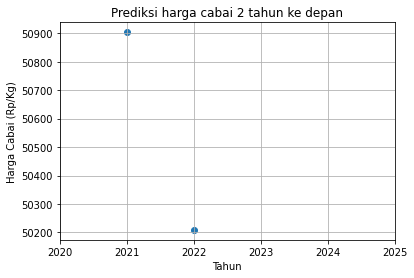

In [22]:
tahun_chili = tahun_chili.flatten()

plt.scatter(tahun_chili, prediksi_harga)

plt.title('Prediksi harga cabai 2 tahun ke depan')
plt.xlabel('Tahun')
plt.ylabel('Harga Cabai (Rp/Kg)')
plt.xlim(2020, 2025)
plt.grid(True)
plt.show()

# Perhitungan Error Prediksi dengan Nilai Asli

Pada tahap ini, akan dibandingkan harga prediksi cabai merah dengan data harga yang sebenarnya. Selanjutnya akan dihitung nilai dari *Mean Absolute Error* pada data harga cabai prediksi dengan data harga cabai asli

In [23]:
data_asli = {'Tahun prediksi': [2021, 2022],
             'Harga cabai asli (Rp/Kg)' : [44415, 41540]}

Asli_df = pd.DataFrame(data_asli)
Asli_df

,Tahun prediksi,Harga cabai asli (Rp/Kg)
0,2021,44415
1,2022,41540


In [24]:
harga_pre = np.array(prediksi_harga)
pre_harga = np.array(Asli_df['Harga cabai asli (Rp/Kg)'])

err = (harga_pre - pre_harga)

MAPE = abs((harga_pre - pre_harga)/pre_harga)*100

for chl, akt, hrg, er, MP in zip(tahun_chili, pre_harga, prediksi_harga, err, MAPE):
  print(f'Tahun : {chl} | Harga Aktual: {akt} | prediksi harga : {hrg} | Error Prediksi: {er} | MAPE: {MP}')

Tahun : 2021 | Harga Aktual: 44415 | prediksi harga : 50903.333333333256 | Error Prediksi: 6488.333333333256 | MAPE: 14.608428083605213
Tahun : 2022 | Harga Aktual: 41540 | prediksi harga : 50209.047619047575 | Error Prediksi: 8669.047619047575 | MAPE: 20.869156521539658


In [25]:
def jumlah_total(daftar_err):
    z=0;
    x = daftar_err
    jml = len(x)

    for i in range(jml):
        y = x[i]
        z+=y
   
    return z

MEA = abs(jumlah_total(err))/len(err)
pr_MAPE = jumlah_total(MAPE)/len(MAPE)
print(f'Mean Absolute Error : {MEA}')
print(f'Mean Precentage Absolute Error : {pr_MAPE}')

Mean Absolute Error : 7578.690476190415
Mean Precentage Absolute Error : 17.738792302572435


Pada analisis di atas dapat dikatakan bahwa dengan memperhitungkan *Mean Absolute Error* (MEA) cukup sedikit yaitu sebesar 7578.690476190415. Pada perhitungan persentasi MEA sebesar 17% yang artinya menurut Lewis (1982) sekitar 10% sampai 20% baik.

# Evaluasi Simple Linear Regression Model

**Training & Testing Dataset**

Pada bagian ini akan dilakukan evaluasi terhadap model menggunakan data tes dan data training

In [ ]:
import numpy as np

x_train = np.array([2015, 2016, 2017, 2018, 2019, 2020]).reshape(-1, 1)
y_train = np.array([30500, 55150, 96350, 60000, 30000, 48000])

x_test = np.array([2021, 2022, 2023, 2024, 2025, 2026]).reshape(-1, 1)
y_test = np.array([44415, 41540, 30500, 70000, 50000, 40000])

**Training Simple Linear Regression Model**

Pada bagian ini akan dibuat sebuah model baru menggunakan Linear Regression

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

**Evaluasi Linear Regression dengan Coefficient of Determination atau R-squered**

Pada bagian ini akan dilakukannya proses evaluasi model

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squered: {r_squared}')

R-squered: -0.10723920154525524


Pada hasil diatas dapat dikatakan bahwa model yang dibuat buruk karena hasil perhitungan evaluasi model menggunakan R-squered adalah negatif